In [336]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Dict, List, Union, Any, Tuple, Callable
from pprint import pprint

## Performance Metrics

The values used for the classification metrics

<img width="300px" src="./assets/example_classification.png" alt="example naive bayes question" />

In [337]:
confusion_matrix = [
    [10, 2, 0],
    [1, 5, 1],
    [2, 0, 12]
]

def classification_metrics_from_confusion_matrix(confusion_matrix: List[List[int]]) -> Dict[str, Dict[str, float]]:
    num_classes = len(confusion_matrix)
    accuracy = sum(confusion_matrix[i][i] for i in range(num_classes)) / sum(sum(row) for row in confusion_matrix)

    metrics = {}
    tp_sum = 0
    fp_sum = 0
    fn_sum = 0

    for c in range(num_classes):
        tp = confusion_matrix[c][c]
        fp = sum(confusion_matrix[i][c] for i in range(num_classes)) - tp
        fn = sum(confusion_matrix[c]) - tp

        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

        tp_sum += tp
        fp_sum += fp
        fn_sum += fn

        metrics[c] = {"precision": precision, "recall": recall, "f1": f1}

    macro_f1 = sum(m["f1"] for m in metrics.values()) / num_classes

    micro_precision = tp_sum / (tp_sum + fp_sum)
    micro_recall = tp_sum / (tp_sum + fn_sum)

    micro_f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall)

    return {
        "accuracy": accuracy,
        "class_metrics": metrics,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
    }

result = classification_metrics_from_confusion_matrix(confusion_matrix)
pprint(result)


{'accuracy': 0.8181818181818182,
 'class_metrics': {0: {'f1': 0.8,
                       'precision': 0.7692307692307693,
                       'recall': 0.8333333333333334},
                   1: {'f1': 0.7142857142857143,
                       'precision': 0.7142857142857143,
                       'recall': 0.7142857142857143},
                   2: {'f1': 0.888888888888889,
                       'precision': 0.9230769230769231,
                       'recall': 0.8571428571428571}},
 'macro_f1': 0.801058201058201,
 'micro_f1': 0.8181818181818182}


### Regression

In [338]:
# Example usage:
coordinates = [(1, 2), (2, 4), (3, 5), (4, 7), (5, 10)]

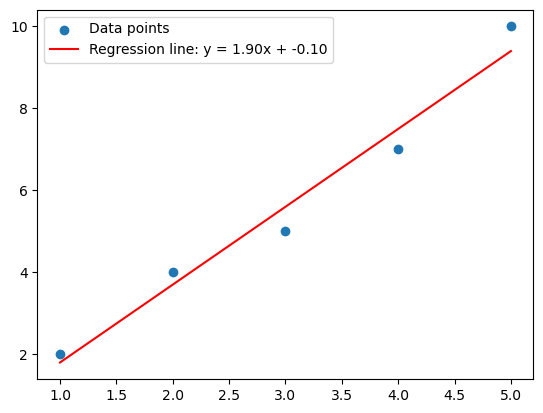

Mean squared error (MSE): 0.2199999999999999
R-squared value: 0.9704301075268817


In [339]:
def plot_regression_line(coordinates: List[Tuple[float, float]]) -> None:
    """
    Plots coordinates and the regression line with its equation.
    
    Args:
        coordinates (List[Tuple[float, float]]): A list of tuples where each tuple represents the (x, y) coordinates.
    """
    # Extract the x and y values from the coordinates
    x = np.array([coord[0] for coord in coordinates])
    y = np.array([coord[1] for coord in coordinates])

    # Compute the regression coefficients
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    # Compute the regression line
    y_pred = m * x + c

    # Plot the coordinates and regression line
    plt.scatter(x, y, label="Data points")
    plt.plot(x, y_pred, "r", label=f"Regression line: y = {m:.2f}x + {c:.2f}")
    plt.legend()
    plt.show()

def assess_regression_performance(coordinates: List[Tuple[float, float]]) -> Tuple[float, float]:
    """
    Computes the mean squared error (MSE) and R-squared value for the regression line.
    
    Args:
        coordinates (List[Tuple[float, float]]): A list of tuples where each tuple represents the (x, y) coordinates.
    
    Returns:
        Tuple[float, float]: A tuple containing the mean squared error (MSE) and R-squared value.
    """
    # Extract the x and y values from the coordinates
    x = np.array([coord[0] for coord in coordinates])
    y = np.array([coord[1] for coord in coordinates])

    # Compute the regression coefficients
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    # Compute the regression line
    y_pred = m * x + c

    # Compute the mean squared error (MSE) and R-squared value
    mse = np.mean((y - y_pred) ** 2)
    r_squared = 1 - (sum((y - y_pred) ** 2) / sum((y - np.mean(y)) ** 2))

    return mse, r_squared

plot_regression_line(coordinates)
mse, r_squared = assess_regression_performance(coordinates)
print(f"Mean squared error (MSE): {mse}")
print(f"R-squared value: {r_squared}")

## Naive Bayes

The values used in the code below are from this question

<img width="300px" src="./assets/example_naive_bayes.png" alt="example naive bayes question" />

In [340]:
# a nested list for each of the classes
c_1 = [
    [1.52, 1.46, 1.68, 1.47, 1.53, 1.6],
    [1.95, 1.76, 2.11, 2.08, 1.94, 1.97]
]

c_2 = [
    [2.04, 1.78, 1.67, 1.82, 1.65],
    [2.24, 2.69, 2.66, 2.43, 2.9]
]

c_3 = [
    [2.15, 1.55, 2.92, 1.23],
    [1.04, 1.08, 0.84, 0.85]
]

classes = [c_1, c_2, c_3]

# this should be provided in the question
x = (2, 2.1)

In [341]:
set_size = 0
for c in classes:
    for i in c[0]:
        set_size += 1

print("set_size = ", set_size, "\n")

for c in classes:
    set_1, set_2 = c[0], c[1] 
    mean_1, mean_2 = np.mean(set_1), np.mean(set_2)
    sd_1, sd_2 = np.std(set_1), np.std(set_2)

    print("mean_1 = ", mean_1, "sd_1 = ", sd_1, "mean_2 = ", mean_2, "sd_2 = ", sd_2)

    class_size = 0
    for i in c[0]:
        class_size += 1

    print(f"class_size = {class_size}")
    
    p_c = class_size / set_size
    print(f"p_c = {p_c}")

    L = np.log(p_c) + np.log(1 / (sd_1 * np.sqrt(2 * np.pi))) + -0.5*((x[0] - mean_1)/sd_1)**2 + np.log(1 /(sd_2 * np.sqrt(2 * np.pi))) + -0.5*((x[1] - mean_2)/sd_2)**2

    print(f"L = {L}\n")

set_size =  15 

mean_1 =  1.5433333333333332 sd_1 =  0.07630348761506399 mean_2 =  1.9683333333333335 sd_2 =  0.11334558757279535
class_size = 6
p_c = 0.4
L = -16.58787118328581

mean_1 =  1.7920000000000003 sd_1 =  0.13962807740565653 mean_2 =  2.584 sd_2 =  0.22756098083810405
class_size = 5
p_c = 0.3333333333333333
L = -2.858797224684779

mean_1 =  1.9625 sd_1 =  0.6439477851503178 mean_2 =  0.9525 sd_2 =  0.10848386976873571
class_size = 4
p_c = 0.26666666666666666
L = -56.442947368638386



## K-Means

The values used in the code below are from this question

<img width="300px" src="./assets/example_knn.png" alt="example knn question" />

In [342]:
def euclidean_distance(p1: Tuple[float, float], p2: Tuple[float, float]) -> float:
    """
    Returns the Euclidean distance between two points in 2D space.
    
    Parameters:
        p1 (Tuple[float, float]): A tuple representing the coordinates of the first point.
        p2 (Tuple[float, float]): A tuple representing the coordinates of the second point.
    
    Returns:
        float: The Euclidean distance between the two points.
    """

    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def get_centroid(points: List[Tuple[float, float]]) -> Tuple[float, float]:
    """
    Returns the centroid of a list of points in 2D space.
    
    Parameters:
    points (List[Tuple[float, float]]): A list of tuples representing the coordinates of each point.
    
    Returns:
    Tuple[float, float]: A tuple representing the coordinates of the centroid.
    """

    # Calculate the average x and y coordinates of the points
    avg_x = sum(p[0] for p in points) / len(points)
    avg_y = sum(p[1] for p in points) / len(points)
    
    # Return the centroid as a tuple of the average coordinates
    return (avg_x, avg_y)

In [343]:
# these should be provided in the question
points = [(1, 2), (1,3), (1, 4), (2,3), (3,5), (2,4), (4, 5), (3, 6)]

c_1_init = (0, 6)
c_2_init = (4, 2)

iterations = 10

In [344]:
c_1 = c_1_init
c_2 = c_2_init
iteration = 0
while iteration < iterations:
    iteration += 1

    c_1_distances = [euclidean_distance(c_1, point) for point in points]
    c_2_distances = [euclidean_distance(c_2, point) for point in points]

    cluster_1 = []
    cluster_2 = []
    for i, point in enumerate(points):
        if c_2_distances[i] < c_1_distances[i]:
            cluster_2.append(point)
        else:
            cluster_1.append(point)

    c_1 = get_centroid(cluster_1)
    c_2 = get_centroid(cluster_2)

    print(f"Cluster 1 : {len(cluster_1)} points ------- {cluster_1}")
    print(f"Cluster 2 : {len(cluster_2)} points ------- {cluster_2}" )

    print(f"Iteration: {iteration} - Centroid 1: {c_1} and Centroid 2: {c_2}")

    

Cluster 1 : 5 points ------- [(1, 3), (1, 4), (3, 5), (2, 4), (3, 6)]
Cluster 2 : 3 points ------- [(1, 2), (2, 3), (4, 5)]
Iteration: 1 - Centroid 1: (2.0, 4.4) and Centroid 2: (2.3333333333333335, 3.3333333333333335)
Cluster 1 : 5 points ------- [(1, 4), (3, 5), (2, 4), (4, 5), (3, 6)]
Cluster 2 : 3 points ------- [(1, 2), (1, 3), (2, 3)]
Iteration: 2 - Centroid 1: (2.6, 4.8) and Centroid 2: (1.3333333333333333, 2.6666666666666665)
Cluster 1 : 4 points ------- [(3, 5), (2, 4), (4, 5), (3, 6)]
Cluster 2 : 4 points ------- [(1, 2), (1, 3), (1, 4), (2, 3)]
Iteration: 3 - Centroid 1: (3.0, 5.0) and Centroid 2: (1.25, 3.0)
Cluster 1 : 3 points ------- [(3, 5), (4, 5), (3, 6)]
Cluster 2 : 5 points ------- [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]
Iteration: 4 - Centroid 1: (3.3333333333333335, 5.333333333333333) and Centroid 2: (1.4, 3.2)
Cluster 1 : 3 points ------- [(3, 5), (4, 5), (3, 6)]
Cluster 2 : 5 points ------- [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]
Iteration: 5 - Centroid 1: (3.

## Search Algos

### Depth First

In [345]:
# a dictionary where there is a key for each node and the value is another dictionary of the connecting nodes and weights
graph = {
    "S": {"A": 4, "C": 5},
    "A": {"B": 3, "D": 3},
    "C": {"G": 4},
    "B": {"D": 2},
    "D": {"E": 2},
    "E": {"G": 1},
    "G": {}
}

def depth_first_search(graph: Dict[str, Dict[str, float]], start: str, goal: str, path: List[str] = None, visited: List[str] = None) -> Union[List[str], None]:
    """
    Perform a depth-first search of the given graph to find a path from the start node to the goal node.

    Args:
        graph (dict): A dictionary representing the graph to be searched. Keys are nodes and values are lists
                      of adjacent nodes.
        start (str): The starting node for the search.
        goal (str): The goal node to be reached.
        path (list, optional): A list containing the current path being searched. Defaults to an empty list.
        visited (set, optional): A set containing the nodes that have already been visited. Defaults to an empty set.

    Returns:
        list: The path from the start node to the goal node, or None if no path exists.
    """
    if visited is None:
        visited = set()

    if path is None:
        path = []

    visited.add(start)
    path = path + [start]

    print(f"Exploring node {start}")

    if start == goal:
        return f"Path found: {path}"

    for neighbor in graph[start]:
        if neighbor not in visited:
            result = depth_first_search(graph, neighbor, goal, path, visited)
            if result:
                return result

    return None

# Driver Code
print(depth_first_search(graph, 'S', 'G'))

Exploring node S
Exploring node A
Exploring node B
Exploring node D
Exploring node E
Exploring node G
Path found: ['S', 'A', 'B', 'D', 'E', 'G']


### Breadth First

In [346]:
# a dictionary where there is a key for each node and the value is another dictionary of the connecting nodes and weights
graph = {
    "S": {"A": 4, "C": 5},
    "A": {"B": 3, "D": 3},
    "C": {"G": 4},
    "B": {"D": 2},
    "D": {"E": 2},
    "E": {"G": 1},
    "G": {}
}

def bfs(graph: Dict[str, Dict[str, float]], start: str, goal: str) -> Union[str, List[Any]]:
    """
    Performs a breadth-first search on the given graph starting from the specified
    start node and searching for the specified goal node.

    Args:
    - graph (dict): a dictionary where there is a key for each node and the value
      is another dictionary of the connecting nodes and their weights
    - start (str): the node to start the search from
    - goal (str): the node to search for

    Returns:
    - Union[str, List[Any]]: a string indicating that the path was not found, or a list of nodes
      representing the path from start to goal.
    """
    
    visited = set()
    queue = [(start, [])]

    while queue:
        (current_node, path) = queue.pop(0)

        if current_node not in visited:
            visited.add(current_node)
            path = path + [current_node]

            print(f"Exploring node {current_node}")

            if current_node == goal:
                return f"Path found: {path}"

            for neighbor in graph[current_node]:
                queue.append((neighbor, path))

    return "Path not found"

# Driver Code
print(bfs(graph, 'S', 'G'))


Exploring node S
Exploring node A
Exploring node C
Exploring node B
Exploring node D
Exploring node G
Path found: ['S', 'C', 'G']


### Uniform Cost 

In [347]:
import heapq

graph = {
    "S": {"A": 1, "G": 12},
    "A": {"B": 3, "C": 1},
    "B": {"D": 3},
    "C": {"D": 1, "G": 2},
    "D": {"G": 3},
    "G": {}
}

def uniform_cost_search(graph: Dict[str, Dict[str, float]], start: str, goal: str) -> Union[str, Tuple[List[str], float]]:
    """
    Find the shortest path from start to goal node using Uniform Cost Search algorithm.

    Args:
    - graph: A dictionary where there is a key for each node and the value is another dictionary of the connecting nodes and weights.
    - start: A string representing the starting node.
    - goal: A string representing the goal node.

    Returns:
    - If path is found, returns a tuple containing the list of nodes in the path and the total cost.
    - If path is not found, returns a string "Path not found".
    """

    visited = set()
    queue = [(0, start, [])]  # (cost, node, path)

    while queue:
        (cost, current_node, path) = heapq.heappop(queue)

        if current_node not in visited:
            visited.add(current_node)
            path = path + [current_node]

            print(f"Exploring node {current_node} with cost {cost}")

            if current_node == goal:
                return f"Path found: {path}, Cost: {cost}"

            for neighbor, edge_cost in graph[current_node].items():
                heapq.heappush(queue, (cost + edge_cost, neighbor, path))

    return "Path not found"

# Driver Code
print(uniform_cost_search(graph, 'S', 'G'))


Exploring node S with cost 0
Exploring node A with cost 1
Exploring node C with cost 2
Exploring node D with cost 3
Exploring node B with cost 4
Exploring node G with cost 4
Path found: ['S', 'A', 'C', 'G'], Cost: 4


### A*

In [348]:
import heapq

graph = {
    "S": {"A": 3, "C": 5},
    "A": {"B": 3, "C": 3, "D": 3},
    "C": {"D": 2, "G": 6},
    "B": {"E": 1},
    "D": {"E": 2},
    "E": {"G": 5},
    "G": {}
}

# Heuristic function for the cost from the current node to the goal.
def heuristic(node: Any, goal: Any) -> int:
    """
    A heuristic function for the cost from the current node to the goal.

    Args:
        node (Any): The current node.
        goal (Any): The goal node.

    Returns:
        int: The estimated cost from the current node to the goal.
    """

    h = {
        "S": 10,
        "A": 8,
        "B": 6,
        "C": 5,
        "D": 5,
        "E": 4,
        "G": 0
    }
    return h[node]

def a_star_search(graph: Dict[Any, Dict[Any, int]], start: Any, goal: Any) -> Union[str, List[Any]]:
    """Performs A* search algorithm to find the shortest path from start to goal in the given graph.

    Args:
        graph (Dict[Any, Dict[Any, int]]): A dictionary representing the graph.
        start (Any): The start node.
        goal (Any): The goal node.

    Returns:
        Union[str, List[Any]]: The path from start to goal if it exists, otherwise a message indicating that the path was not found.
    """
        
    visited = set()
    queue = [(0 + heuristic(start, goal), 0, start, [])]  # (f, g, node, path)

    while queue:
        (f, g, current_node, path) = heapq.heappop(queue)

        if current_node not in visited:
            visited.add(current_node)
            path = path + [current_node]

            print(f"Exploring node {current_node} with cost {g}")

            if current_node == goal:
                return f"Path found: {path}, Cost: {g}"

            for neighbor, edge_cost in graph[current_node].items():
                new_g = g + edge_cost
                new_f = new_g + heuristic(neighbor, goal)
                heapq.heappush(queue, (new_f, new_g, neighbor, path))

    return "Path not found"

# Driver Code
print(a_star_search(graph, 'S', 'G'))


Exploring node S with cost 0
Exploring node C with cost 5
Exploring node A with cost 3
Exploring node D with cost 6
Exploring node G with cost 11
Path found: ['S', 'C', 'G'], Cost: 11


### Greedy Best-First

In [349]:
import heapq

graph = {
    "H": ["A", "B", "C"],
    "A": ["Q"],
    "B": ["A"],
    "C": ["U"],
    "Q": ["G"],
    "U": ["G"],
    "G": []
}

# Heuristic function for the cost from the current node to the goal.
def heuristic(node: Any, goal: Any) -> float:
    """
    Heuristic function to estimate the cost from the current node to the goal node.

    Args:
        node: The current node in the graph.
        goal: The goal node in the graph.

    Returns:
        A float value representing the estimated cost from the current node to the goal node.
    """
    
    h = {
        "H": 2,
        "A": 1,
        "B": 0.8,
        "C": 1.5,
        "Q": 0.75,
        "U": 0.5,
        "G": 0
    }
    return h[node]

def greedy_best_first_search(graph: Dict[Any, List[Any]], start: Any, goal: Any) -> Union[str, List[Any]]:
    """
    Implementation of the greedy best-first search algorithm.

    Args:
        graph: The graph in which the search will be performed.
        start: The starting node for the search.
        goal: The goal node for the search.

    Returns:
        A string indicating that the path was not found or a list representing the path from the start node to the goal node.
    """

    visited = set()
    queue = [(heuristic(start, goal), start, [])]  # (h, node, path)

    while queue:
        (h, current_node, path) = heapq.heappop(queue)

        if current_node not in visited:
            visited.add(current_node)
            path = path + [current_node]

            print(f"Exploring node {current_node} with heuristic {h}")

            if current_node == goal:
                return f"Path found: {path}"

            for neighbor in graph[current_node]:
                heapq.heappush(queue, (heuristic(neighbor, goal), neighbor, path))

    return "Path not found"

# Driver Code
print(greedy_best_first_search(graph, 'H', 'G'))


Exploring node H with heuristic 2
Exploring node B with heuristic 0.8
Exploring node A with heuristic 1
Exploring node Q with heuristic 0.75
Exploring node G with heuristic 0
Path found: ['H', 'A', 'Q', 'G']


### Evaluate Heuristic

### Example

The Graph Network used in the following example

<img width="300px" src="./assets/example_search.png" alt="example graph network" />


In [350]:
# graph network with costs - can be used with the DFS, BFS, UCS and A* functions
graph = {
    "H": {"A": 1.8, "B": 1.8, "C": 1.7},
    "A": {"Q": 0.2},
    "B": {"A": 1},
    "C": {"U": 1.5},
    "Q": {"G": 0.9},
    "U": {"G": 0.7},
    "G": {}
}

# graph network without costs - only use with the greedy_best_first_search function 
graph = {
    "H": ["A", "B", "C"],
    "A": ["Q"],
    "B": ["A"],
    "C": ["U"],
    "Q": ["G"],
    "U": ["G"],
    "G": []
}

# the heuristics of each node in the network - replace this in the `heuristic` function for A* or greedy_best_first_search
h = {
    "H": 2,
    "A": 1,
    "B": 0.8,
    "C": 1.5,
    "Q": 0.75,
    "U": 0.5,
    "G": 0
}


## Binary Bullshit

In [351]:
def single_point_crossover(parent1: str, parent2: str, crossover_point: int) -> Tuple[str, str]:
    """
    Performs single-point crossover on two binary strings.
    
    Args:
        parent1 (str): The first binary string parent.
        parent2 (str): The second binary string parent.
        crossover_point (int): The point to do the crossover.
    
    Returns:
        tuple: A tuple containing two binary strings, the offspring of the input parents.
    """
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
    return offspring1, offspring2


def double_point_crossover(parent1: str, parent2: str, crossover_point1: int, crossover_point2: int) -> Tuple[str, str]:
    """
    Performs double-point crossover on two binary strings.
    
    Args:
        parent1 (str): The first binary string parent.
        parent2 (str): The second binary string parent.
        crossover_point1 (int): The first point to do the crossover.
        crossover_point2 (int): The second point to do the crossover.

    
    Returns:
        tuple: A tuple containing two binary strings, the offspring of the input parents.
    """
    offspring1 = parent1[:crossover_point1] + parent2[crossover_point1:crossover_point2] + parent1[crossover_point2:]
    offspring2 = parent2[:crossover_point1] + parent1[crossover_point1:crossover_point2] + parent2[crossover_point2:]
    return offspring1, offspring2


def swap_mutation(binary_string: str, index1: int, index2: int) -> str:
    """
    Performs swap mutation on a binary string.
    
    Args:
        binary_string (str): The input binary string.
    
    Returns:
        str: The mutated binary string.
    """

    binary_list = list(binary_string)
    binary_list[index1], binary_list[index2] = binary_list[index2], binary_list[index1]
    return ''.join(binary_list)
    

def binary_to_decimal(binary_string: str) -> int:
    """
    Converts a binary string to a decimal integer.
    
    Args:
        binary_string (str): The input binary string.
    
    Returns:
        int: The decimal integer representation of the input binary string.
    """
    return int(binary_string, 2)


### Examples

Example 1

<img height="100px" src="./assets/example_binary_1.png" alt="example graph network" />

In [352]:
A = "0101101"
B = "1011000"

A_prime, B_prime = single_point_crossover(A, B, crossover_point=3)
print(f"After Single Point Crossover: A'={A_prime}, B'={B_prime}")

A_prime = swap_mutation(A_prime, index1=2, index2=5)
B_prime = swap_mutation(B_prime, index1=1, index2=2)
print(f"\nAfter Swap Mutation: A'={A_prime}, B'={B_prime}")

A_dec = binary_to_decimal(A_prime)
B_dec = binary_to_decimal(B_prime)
print(f"\nDecimal Representations: A'={A_dec}, B'={B_dec}")

After Single Point Crossover: A'=0101000, B'=1011101

After Swap Mutation: A'=0101000, B'=1101101

Decimal Representations: A'=40, B'=109


Example 2

<img height="150px" src="./assets/example_binary_2.png" alt="example graph network" />

In [353]:
A = "0101101"
B = "1011000"

A_prime, B_prime = double_point_crossover(A, B, crossover_point1=1, crossover_point2=3)
print(f"After Double Point Crossover: A'={A_prime}, B'={B_prime}")

A_prime = swap_mutation(A_prime, index1=2, index2=5)
B_prime = swap_mutation(B_prime, index1=2, index2=5)
print(f"\nAfter Swap Mutation: A'={A_prime}, B'={B_prime}")

A_dec = binary_to_decimal(A_prime)
B_dec = binary_to_decimal(B_prime)
print(f"\nDecimal Representations: A'={A_dec}, B'={B_dec}")

After Double Point Crossover: A'=0011101, B'=1101000

After Swap Mutation: A'=0001111, B'=1101000

Decimal Representations: A'=15, B'=104


## Fitness

In [354]:
def fitness_function(x: float) -> float:
    """
    Calculates the fitness value for the given input using the fitness function.
    
    Args:
        x (float): The input value.

    Returns:
        float: The fitness value.
    """
    return (-0.5 * x**2) + (3 * x) + 8


def get_fitness_values(individuals):

    fitness_values = {}

    for individual, x_value in individuals.items():
        fitness = fitness_function(x_value)
        fitness_values[individual] = fitness

    print("Fitness values for each individual:")
    for individual, fitness in fitness_values.items():
        print(f"{individual}: {fitness}")

    return fitness_values


def roulette_wheel_selection(individual_fitness: Dict[str, float], random_number: float) -> str:
    """
    Performs roulette wheel selection on the given dictionary of individuals and their fitness values.
    
    Args:
        individual_fitness (Dict[str, float]): A dictionary containing individuals as keys and their fitness values as values.
        random_number (float): A random number between 0 and 1.
        
    Returns:
        str: The selected individual.
    """

    # Normalize the fitness values to obtain probabilities
    total_fitness = sum(individual_fitness.values())
    probabilities = {individual: fitness / total_fitness for individual, fitness in individual_fitness.items()}

    # Compute the cumulative probabilities
    cumulative_probabilities = []
    cumulative_probability = 0
    for individual, probability in probabilities.items():
        cumulative_probability += probability
        cumulative_probabilities.append((individual, cumulative_probability))

    # Roulette wheel selection
    selected_individual = None
    for individual, cumulative_probability in cumulative_probabilities:
        if random_number <= cumulative_probability:
            selected_individual = individual
            break

    return selected_individual

#### Example

<img width="600px" src="./assets/example_roulette.png" alt="example graph network" />

Great formatting...

`The answer provided by this function 'C' is apparently incorrect - the answer provided is 'B'.`

`I do not know why. I believe 'C' to be the answer`

In [355]:
# define the fitness function
def fitness_function(x: float) -> float:
    """
    Calculates the fitness value for the given input using the fitness function.
    
    Args:
        x (float): The input value.

    Returns:
        float: The fitness value.
    """
    return -0.5 * x**2 + 3 * x + 8

# the individual and their values
individuals = {
    "A": 5.72,
    "B": 0.13,
    "C": 7.26,
    "D": 7.55,
    "E": 2.22
}

# get the fitness values for each individual
individual_fitness = get_fitness_values(individuals)

# should be given in the question
random_number = 0.53

selected_individual = roulette_wheel_selection(individual_fitness, random_number)
print(f"\nThe selected individual for the random number {random_number} is {selected_individual}.")

Fitness values for each individual:
A: 8.800800000000002
B: 8.38155
C: 3.4262000000000015
D: 2.1487499999999997
E: 12.1958

The selected individual for the random number 0.53 is C.
